 Prepare a classification model using Naive Bayes
for salary data

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work

education	-- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship --

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual


In [1]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px


In [2]:
upload=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
upload=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


**Improting training Data**

In [4]:
data_train=pd.read_csv('SalaryData_Train.csv')
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data_test=pd.read_csv("SalaryData_Test.csv")
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


**EDA**

In [6]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
columns=['age','workclass','education','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary']
for i in columns:
  print(i)
  print(data_train[i].value_counts())
  print('\n')



age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64


workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spous

**VISUALIZATIONS**

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


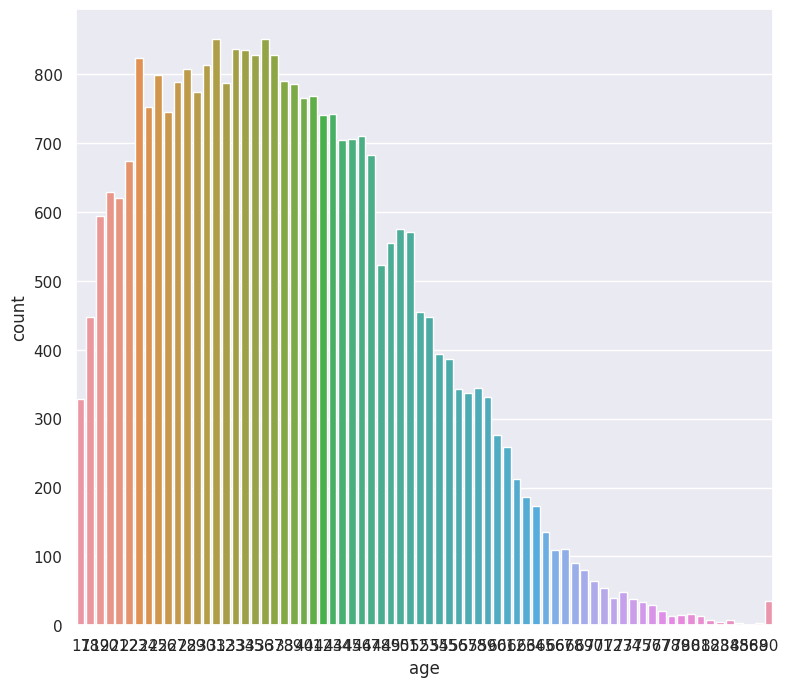

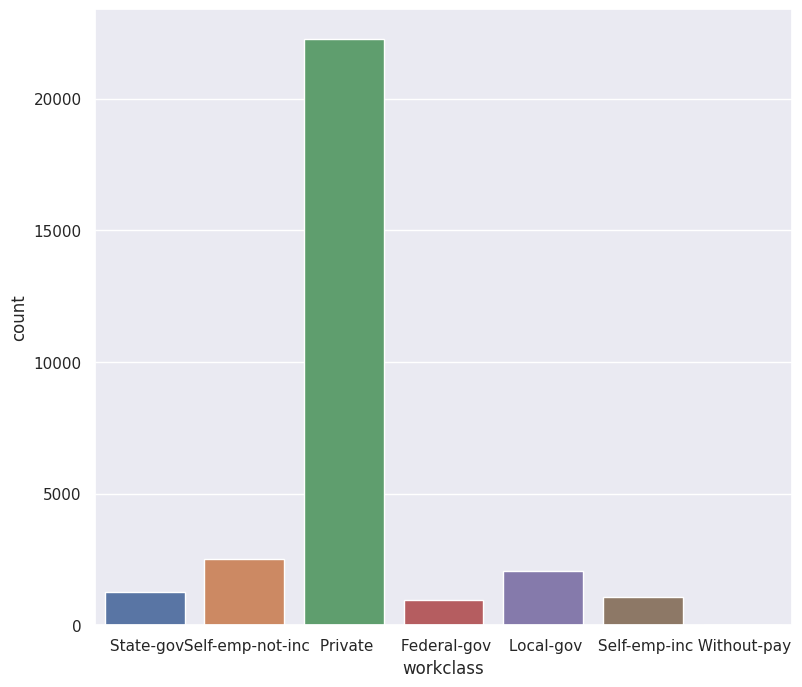

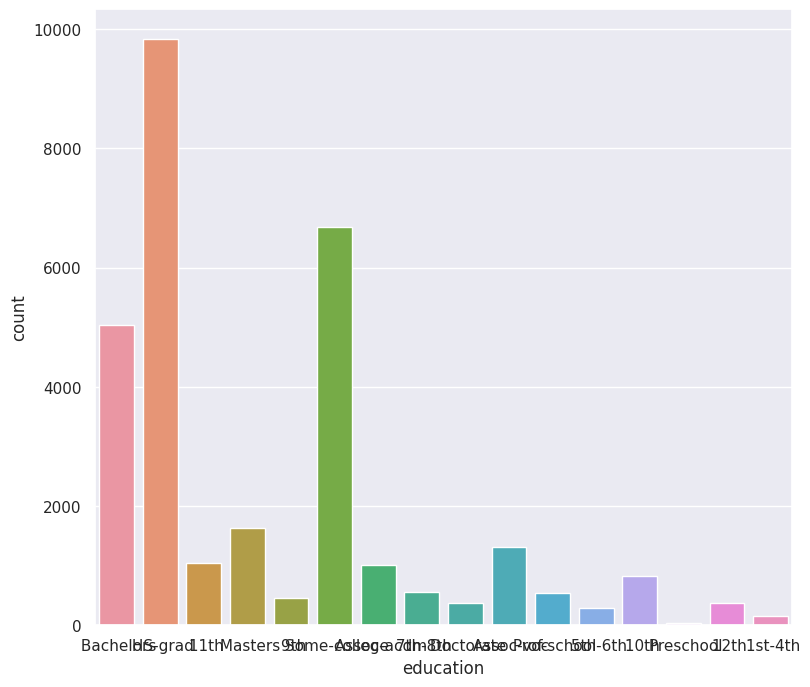

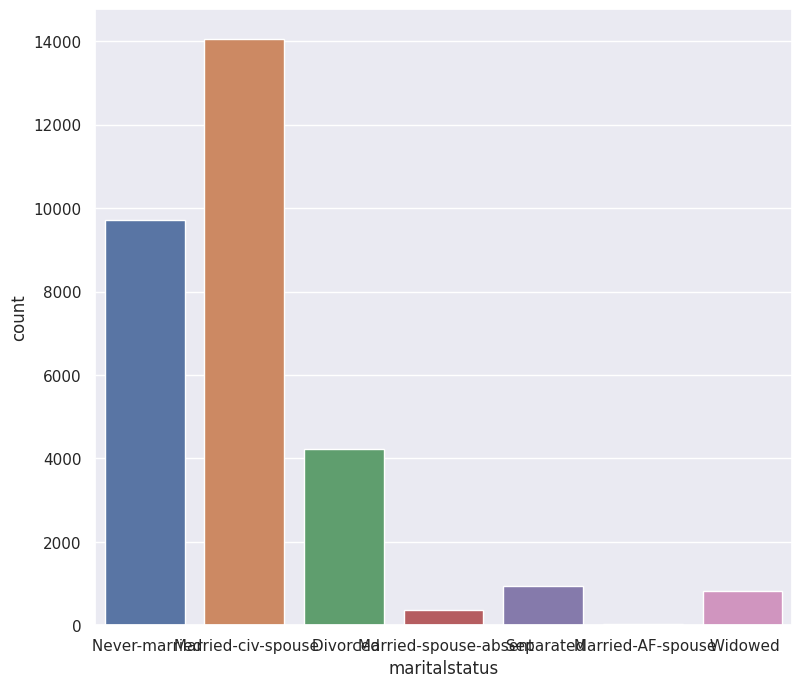

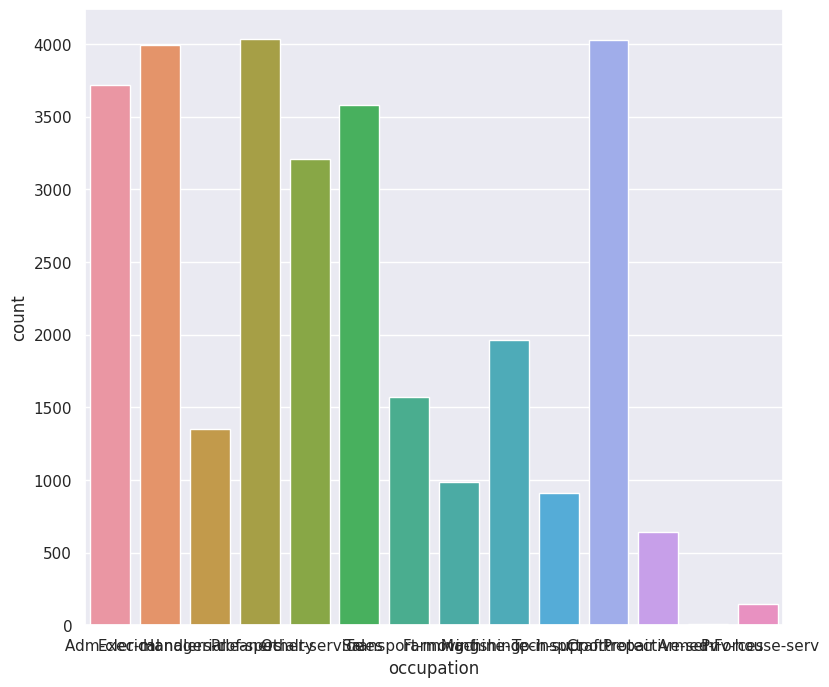

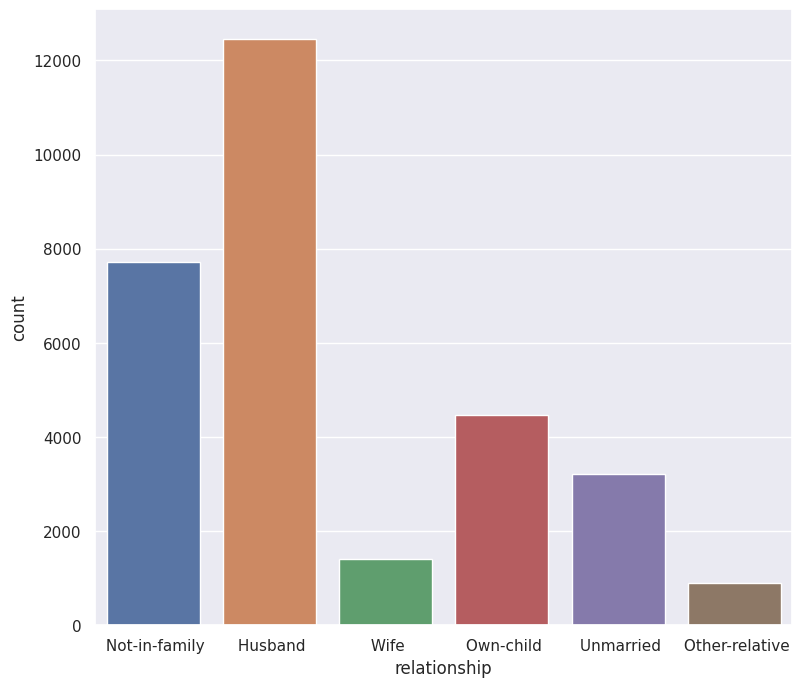

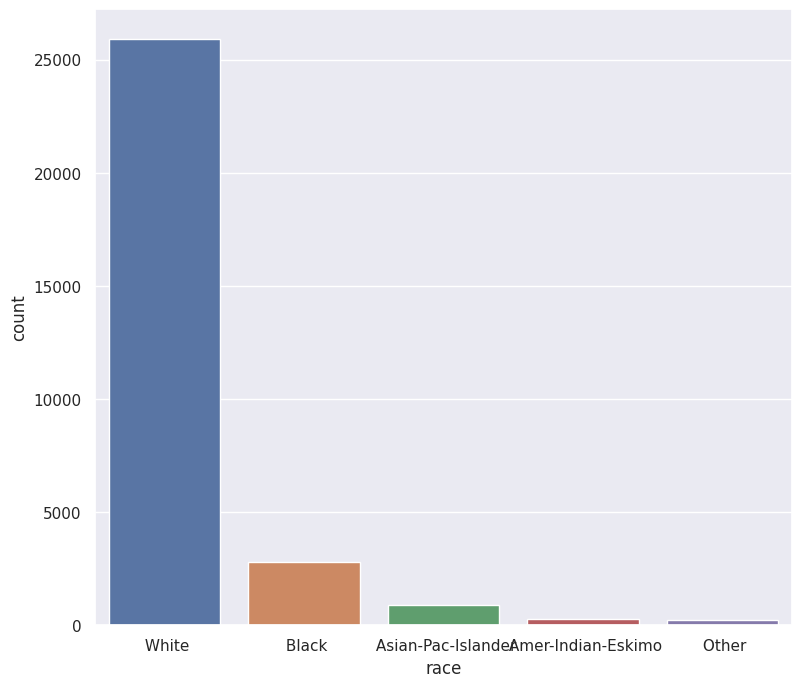

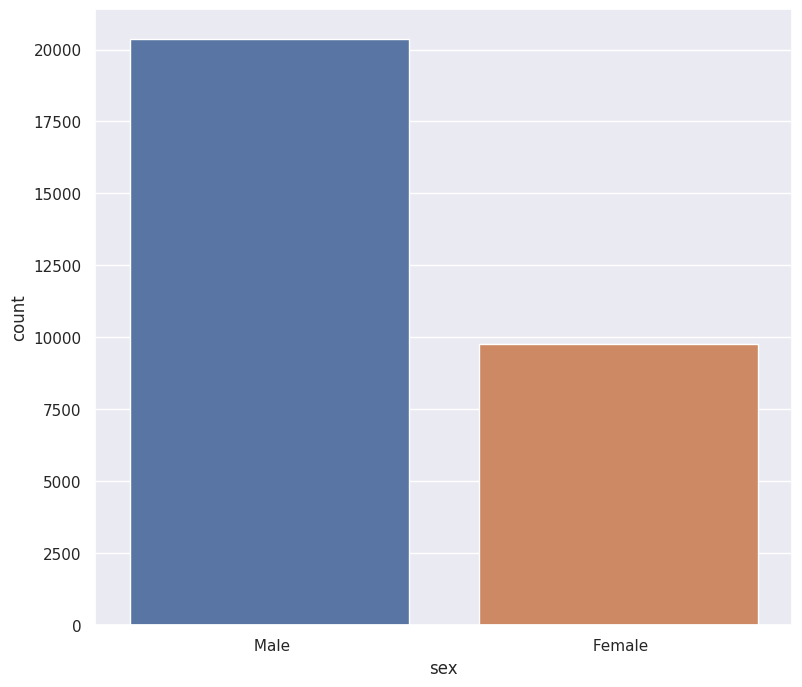

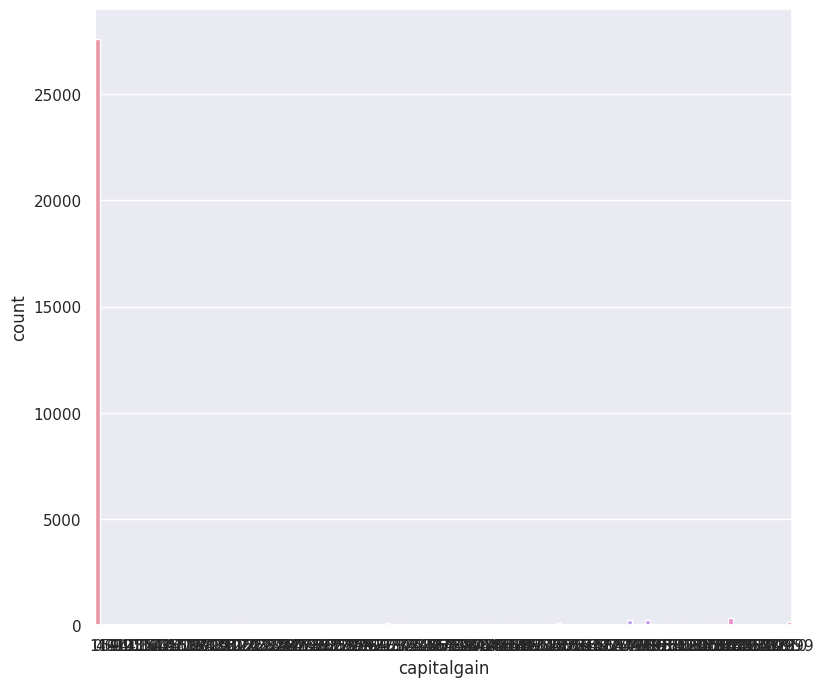

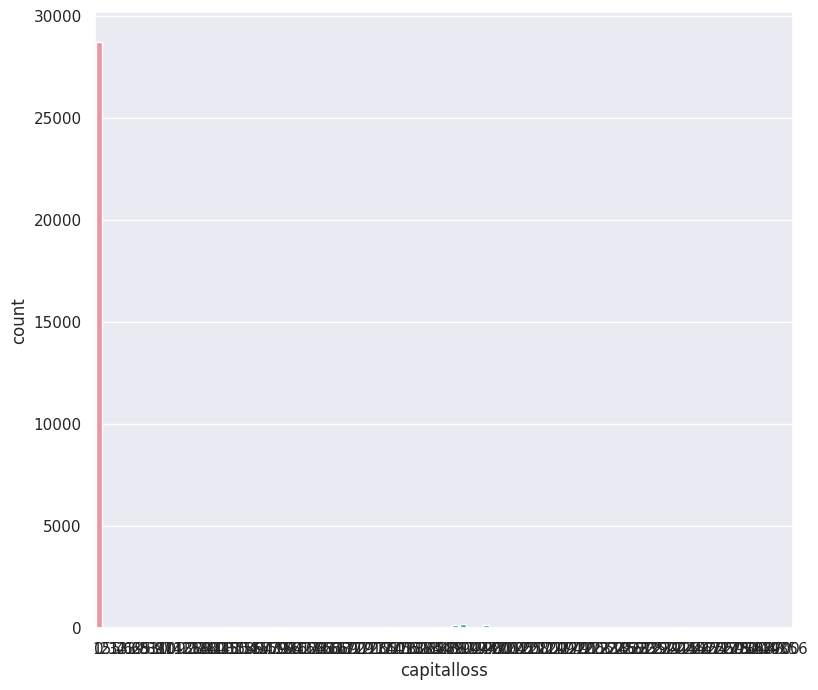

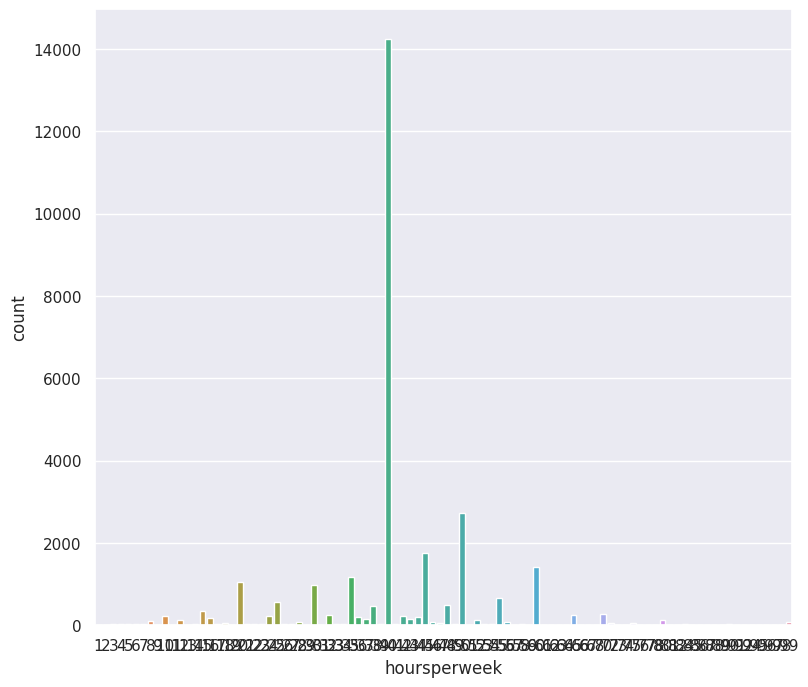

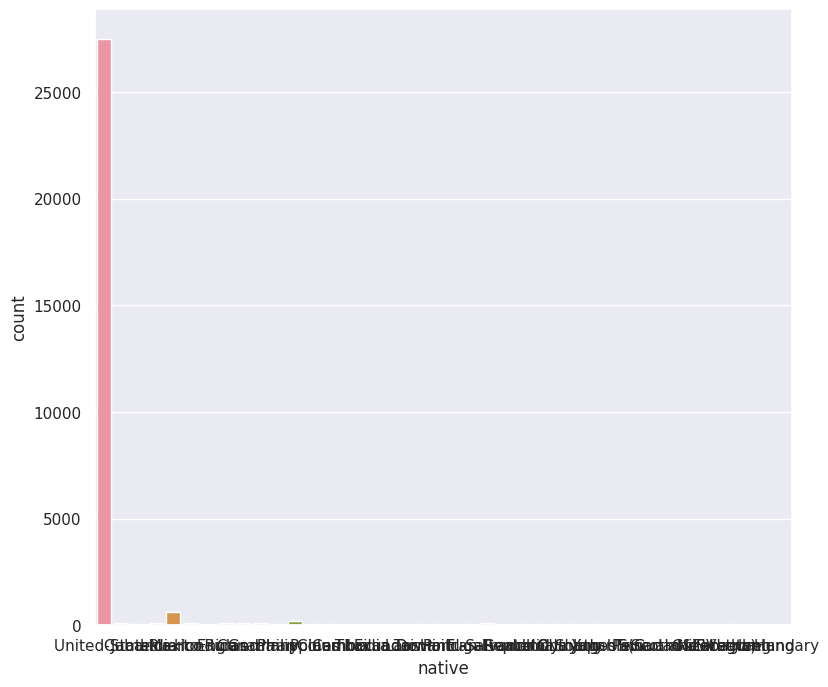

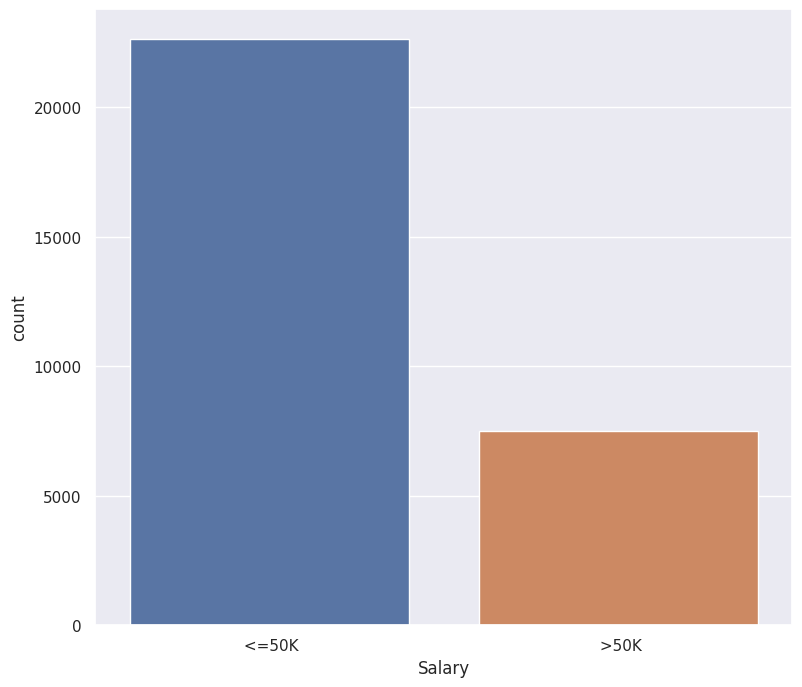

In [9]:
columns=['age','workclass','education','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary']
sns.set(rc={'figure.figsize':(9,8)})
for i in columns:
  plt.figure()
  print(sns.countplot(x=i,data=data_train))

<ipython-input-10-3bc8ed069cd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['capitalgain'])


<Axes: xlabel='capitalgain', ylabel='Density'>

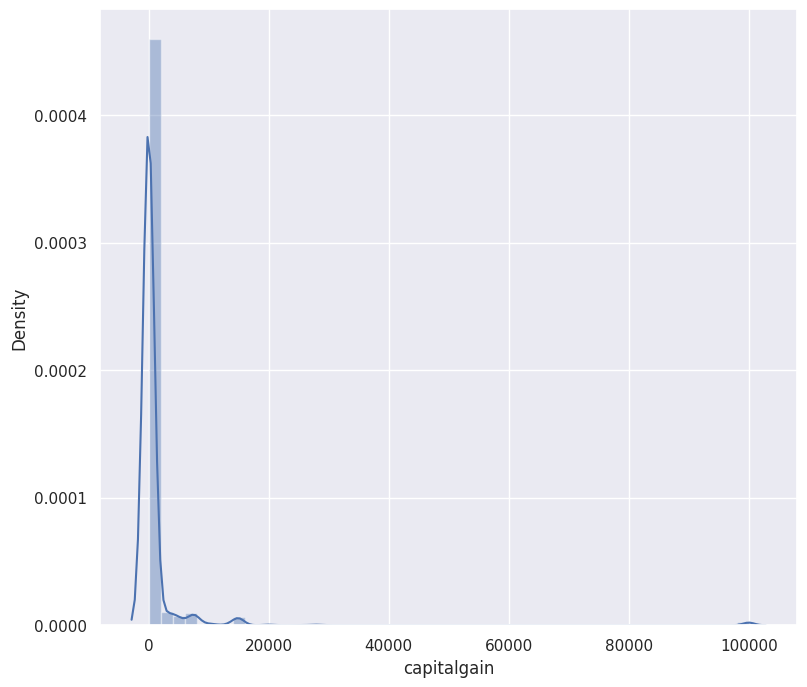

In [10]:
sns.distplot(data_train['capitalgain'])

<ipython-input-11-da0f5d4692c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['capitalloss'])


<Axes: xlabel='capitalloss', ylabel='Density'>

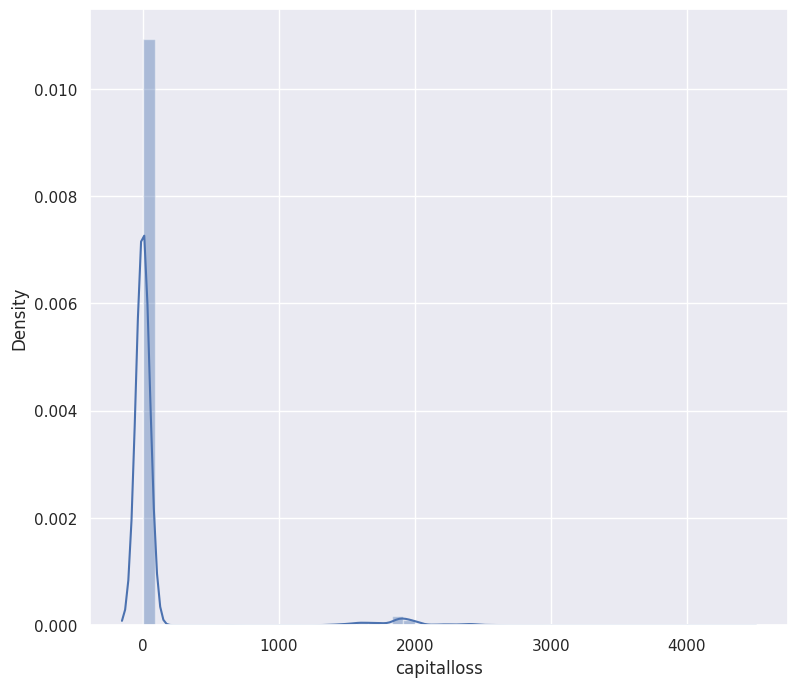

In [11]:
sns.distplot(data_train['capitalloss'])

**FEATURE ENGINEERING**

In [27]:
le=LabelEncoder()
data_train['age']=le.fit_transform(data_train['age'])
data_train['workclass']=le.fit_transform(data_train['workclass'])
data_train['educationno']=le.fit_transform(data_train['educationno'])
data_train['capitalgain']=le.fit_transform(data_train['capitalgain'])
data_train['hoursperweek']=le.fit_transform(data_train['hoursperweek'])
data_train['Salary']=le.fit_transform(data_train['Salary'])
data_train['race']=le.fit_transform(data_train['race'])
data_train['capitalgain']=le.fit_transform(data_train['capitalgain'])
data_train['capitalloss']=le.fit_transform(data_train['capitalloss'])
data_train['education']=le.fit_transform(data_train['education'])
data_train['maritalstatus']=le.fit_transform(data_train['maritalstatus'])
data_train['occupation']=le.fit_transform(data_train['occupation'])
data_train['race']=le.fit_transform(data_train['race'])
data_train['native']=le.fit_transform(data_train['native'])
data_train['relationship']=le.fit_transform(data_train['relationship'])
data_train['sex']=le.fit_transform(data_train['sex'])
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [28]:
le=LabelEncoder()
data_test['age']=le.fit_transform(data_test['age'])
data_test['workclass']=le.fit_transform(data_test['workclass'])
data_test['educationno']=le.fit_transform(data_test['educationno'])
data_test['capitalgain']=le.fit_transform(data_test['capitalgain'])
data_test['hoursperweek']=le.fit_transform(data_test['hoursperweek'])
data_test['Salary']=le.fit_transform(data_test['Salary'])
data_test['race']=le.fit_transform(data_test['race'])
data_test['capitalgain']=le.fit_transform(data_test['capitalgain'])
data_test['capitalloss']=le.fit_transform(data_test['capitalloss'])
data_test['education']=le.fit_transform(data_test['education'])
data_test['maritalstatus']=le.fit_transform(data_test['maritalstatus'])
data_test['occupation']=le.fit_transform(data_test['occupation'])
data_test['race']=le.fit_transform(data_test['race'])
data_test['native']=le.fit_transform(data_test['native'])
data_test['relationship']=le.fit_transform(data_test['relationship'])
data_test['sex']=le.fit_transform(data_test['sex'])
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


**Splitting into Train and Test**

In [29]:
x_train=data_train.iloc[:,:-1]
y_train=data_train.iloc[:,-1]

**Train_test_split**

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

**Generating MultinomialNB Model**

In [31]:
MB_train=MultinomialNB()
MB_train.fit(x_train,y_train)

MultinomialNB()

In [32]:
MB_train.score(x_train,y_train)

0.7785145888594165

In [33]:
Accu_train_ds=MB_train.score(x_test,y_test)
Accu_train_ds

0.7823636665009116

In [34]:
print('accuracy of MultiNominalMB :',MB_train.score(x_test,y_test))

accuracy of MultiNominalMB : 0.7823636665009116


In [55]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

**predicting test ds**

In [36]:
new_prediction=MB_train.predict(x_test)
new_prediction

array([0, 0, 0, ..., 0, 1, 0])

In [37]:
print(classification_report(y_test,new_prediction))
#print(metrics.classification_report(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11360
           1       0.61      0.30      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.62      0.63     15060
weighted avg       0.76      0.78      0.75     15060



In [38]:
Accu_test_ds=accuracy_score(y_test,new_prediction)
Accu_test_ds

0.7802124833997344

In [39]:
print('Accuracy_score of test_model in MB :',accuracy_score(y_test,new_prediction))

Accuracy_score of test_model in MB : 0.7802124833997344


In [41]:
x=['NB_Train_data','NB_Test_data']
y=[Accu_train_ds,Accu_test_ds]
fig=px.bar(x=x,y=y,title='Model vs ModeL_Accuracy',labels={'x':'Model','y':'ModeL_Accuracy'})
fig.show()

# GaussianNB model

**Fitting Model**

In [70]:
model_Guassian=GaussianNB()
model_Guassian.fit(x_train,y_train)

GaussianNB()

In [71]:
y_pred_trainNB=model_Guassian.score(x_train,y_train)
y_pred_trainNB

0.8116296419098143

In [72]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

**testing the model for test ds**

In [74]:
new_pred=model_Guassian.predict(x_test)
new_pred

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
y_test_NB=accuracy_score(y_test,new_pred)
y_test_NB

0.8153386454183267

In [77]:
x=['NB_Train_data','NB_Test_data']
y=[y_pred_trainNB,y_test_NB]
fig=px.bar(x=x,y=y,title='Model vs ModeL_Accuracy',labels={'x':'Model','y':'ModeL_Accuracy'})
fig.show()

**From this,we can conclude that Guassian model gives the highest accuracy for test dataset**